# Pre-lecture HW 03 - Cayden Wong 2024/09/08

##### Important Notes
Use `fig.show(renderer="png")` for all plots

### Question 1: Use `fig.add[h/v]line()` and `fig.add[h/v]rect()` to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset

Session link for Q1: https://chatgpt.com/share/66ef9c6a-4468-8012-b97f-ae0d51a82ad3

In [41]:
import pandas as pd
import plotly.express as px
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [42]:
for species in penguins["species"].unique():
    penguin_histogram = px.histogram(penguins[penguins["species"] == species], x="flipper_length_mm", color="species", nbins=20, width=500)
    penguins_of_species_flipper_length = penguins[penguins["species"] == species]["flipper_length_mm"]
    mean = penguins_of_species_flipper_length.mean()
    median = penguins_of_species_flipper_length.median()
    upper = penguins_of_species_flipper_length.max()
    lower = penguins_of_species_flipper_length.min()
    q1 = penguins_of_species_flipper_length.quantile(0.25)
    q3 = penguins_of_species_flipper_length.quantile(0.75)
    two_std_below = mean - penguins_of_species_flipper_length.std() * 2
    two_std_above = mean + penguins_of_species_flipper_length.std() * 2

    penguin_histogram.add_vline(x=mean, line_dash="dash", line_color="white")
    penguin_histogram.add_vline(x=median, line_dash="dot", line_color="black")
    penguin_histogram.add_vrect(x0=lower, x1=upper, line_color="red")
    penguin_histogram.add_vrect(x0=q1, x1=q3, line_color="blue")
    penguin_histogram.add_vrect(x0=two_std_below, x1=two_std_above, line_color="green")

    penguin_histogram.show() #TODO: 
    

#### NotebookLM: Summary of interaction
##### Summary of Our Interaction: Exploring Standard Deviation and Line Customization in Data Visualization

Our conversation revolved around understanding standard deviation and customizing line styles in data visualizations. We explored how to calculate and visualize lines representing two standard deviations from the mean on a histogram, drawing heavily on the concepts and code examples presented in the sources. You specifically asked about:

*   **Terminology for the 1st and 3rd quartiles:**  You were curious about the terms used for the 1st and 3rd quartiles.  We established that they are often referred to as "first quartile" or Q1 (25th percentile), and "third quartile" or Q3 (75th percentile), respectively.
*   **Calculating line positions two standard deviations from the mean:** You sought clarification on calculating line positions to represent two standard deviations above and below the mean.  We reviewed the provided formulas and explained their relevance in highlighting data spread, especially in a normal distribution.
*   **DataFrame method for standard deviation:** You asked if there's a pandas DataFrame method to return the standard deviation. We confirmed that `.std()` is used, and reviewed its application to a column.
*   **Options for line types in data visualization libraries:** You wanted to understand the different line styles (like dashed, dotted) available in libraries like *plotly*. While the sources didn't explicitly list these options, we discussed common line types and recommended consulting library documentation for specific options.
*   **Changing the line type of a `vrect` object:**  You were curious about modifying the line type of a `vrect`. I explained that the sources lack direct information on `vrect` customization. To assist further, I asked you to provide more context about the library and the visual effect you aimed to achieve. 

**Overall, our interaction focused on practical aspects of data visualization, specifically using lines to represent statistical concepts like standard deviation. We relied on the code examples and the emphasis on customization found in the sources to address your questions.** 

#### ChatGPT: Summary of interaction
Here's a summary of our entire interaction:

1. **Mean, Median, and Skewness**:
   - We discussed the relationship between the mean, median, and skewness. For **right (positive) skewness**, the mean is greater than the median, and for **left (negative) skewness**, the mean is less than the median due to the influence of outliers on the mean.
   - You shared some Python code using the `scipy.stats.gamma` distribution to generate skewed data samples and calculate descriptive statistics like mean and median. I explained how the code works and what it does.

2. **Plotly Renderers in VS Code**:
   - You mentioned that using `renderer="png"` in Plotly's `px.histogram` in VS Code's `.ipynb` files was taking a long time to render (over 3 minutes).
   - I explained that PNG rendering can be slower compared to interactive modes and suggested alternatives like using the default interactive renderer or saving the plot directly as an image using `fig.write_image()`.

3. **Customizing Plotly Histogram Colors**:
   - You asked about aligning the colors of `vline` and `vrect` with the colors used for the `species` in a Plotly histogram.
   - I showed how to manually define a color map for each species and apply the corresponding colors to the vertical lines and rectangles, so they match the species color in the histogram.

4. **Clarification on `max()` and `min()`**:
   - You inquired about what `max()` and `min()` return. I explained that these functions return the maximum and minimum values of the given dataset, which in your case represent the extremes of flipper lengths for each species.

Let me know if you need further clarification or help!

### Question 2: Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

Session link for Q2: 

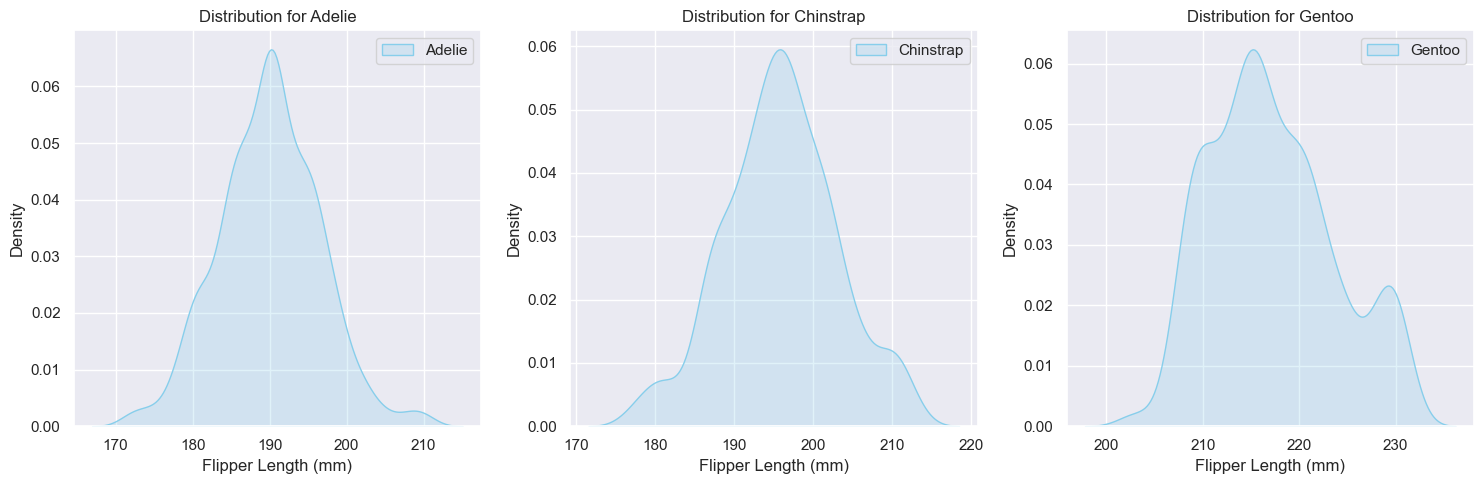

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Styling the plots
sns.set_style("darkgrid")
sns.set_context("notebook")
sns.set_palette("coolwarm")

# Lines three plots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, species in enumerate(penguins['species'].unique()):
    subset = penguins[penguins['species'] == species]
    
    # Create the KDE plot on the corresponding axis
    sns.kdeplot(x='flipper_length_mm', data=subset, ax=axes[i], label=species, color="skyblue", fill=True, bw_adjust=0.7)
    axes[i].set_title(f'Distribution for {species}')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

plt.tight_layout() # Adjust spacing between plots
plt.show()
plt.show() #TODO: 
    

#### ChatGPT: Interaction summary
Here's a summary of our interaction following the previous summary:

1. **Seaborn `axvline()` Color Customization**:
   - You asked how to change the color of a `seaborn` `axvline()` in a plot. I explained that you can pass the `color` argument when using `plt.axvline()`, allowing you to set the line color using named colors, hexadecimal codes, or RGB triplets.

2. **Multiple Seaborn Plots in a Single Cell**:
   - You asked if it’s possible to output multiple Seaborn graphs from a single `.ipynb` cell. I demonstrated how to create multiple plots using `plt.figure()` for each plot in the same cell and display them sequentially using `plt.show()`.

3. **Seaborn Styles**:
   - You inquired about setting a "nice" style for `kdeplot`. I explained how to use `sns.set_style()` to apply built-in Seaborn styles like `"whitegrid"`, `"darkgrid"`, and `"ticks"`, and demonstrated examples.
   - I also mentioned how you can combine `sns.set_style()`, `sns.set_context()`, and `sns.set_palette()` to further customize the appearance of the plots.

4. **Popular Style Combinations in Seaborn**:
   - You asked about popular combinations of `set_style`, `set_context`, and `set_palette`. I provided common combinations such as `"whitegrid"` with `"talk"` context and `"muted"` palette for professional looks, and `"darkgrid"` with `"coolwarm"` palette for contrast-rich visuals. These combinations are often used in presentations, reports, or data analysis.

5. **Changing the Bandwidth of a `kdeplot`**:
   - You asked how to change the bandwidth of a `kdeplot`. I explained two methods:
     - **`bw_adjust`**: Multiplies the default bandwidth by a scaling factor (e.g., `bw_adjust=0.5` for finer details, `bw_adjust=1.5` for smoother curves).
     - **`bw_method`**: Allows the use of specific bandwidth selection methods like `'scott'` or `'silverman'`.

Let me know if you need further clarification on any of these topics!

#### NotebookLM: Interaction Summary
##### Summary of Our Conversation: Seaborn, KDEs, and Data Visualization

Our conversation began with you asking how to change line colors in data visualization libraries. I explained that while the sources don't provide an exhaustive list, they emphasize the customization flexibility of tools like *plotly* and *seaborn*, implying that line color would be a customizable feature. We looked at examples from our previous interactions and I noted that color manipulation is often handled through arguments like `line_color` in *plotly* and `color` in *seaborn* (which leverages *matplotlib*'s capabilities). I also mentioned common approaches to specifying colors: named colors, hex codes, and RGB values. 

You then shifted the focus to using *seaborn* to create KDE plots arranged in a row of three.  I confirmed that *seaborn* would be suitable based on Source's statement contrasting *plotly* with *seaborn* for KDEs: "Histograms versus kernel density estimates (KDEs) - plotly (not this) VS Waskom's seaborn". I provided an illustrative code example using `sns.kdeplot()` to generate the KDE plots and *matplotlib.pyplot*'s `subplots()` to arrange them.  

Our conversation then explored the concept of "nbin" in the context of KDEs. You were curious about increasing the "nbin" of a KDE plot.  I clarified that "nbin" is not directly applicable to KDEs because they don't use bins like histograms. KDEs use kernel functions and a parameter called "bandwidth" to control smoothness. We established the analogy between "nbin" in histograms and "bandwidth" in KDEs: a higher "nbin" in histograms generally corresponds to more detail (Source: "More **histogram bins** means a finer less course less simplified visually summer of the data."), while a *narrower* bandwidth in KDEs achieves a similar effect. Source supports this, stating that the "bandwidth" parameter determines the "width" of the kernel used in the KDE.

Finally, we discussed the trade-off in selecting an appropriate bandwidth: a very narrow bandwidth can lead to overfitting, similar to using too many bins in a histogram, while a very wide bandwidth can oversmooth the KDE, obscuring important features. I suggested visual inspection and the use of automatic bandwidth selection methods provided by some libraries as ways to find a good balance.  


### Question 3: Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

Session Link for Q3: 

Box Plot:
- Indicates where the IQR lies within the data
- Determines where outliers lie relative to the rest of the data
- Best at indicating the general range of the data and identifying where most of the data lies
- Not good at determining the type of spread across the data (unimodal, bimodal, multimodal)

Histogram:
- Indicates the number of observations within a certain range of values
- Good at comparing the number of observations within a continuous dataset
- Can identify where values seem to group together and